In [2]:
import folium
import json
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import statsmodels.api as sm

#import geopandas as gpd
#from shapely.geometry import Polygon, LineString, Point
# import fiona

In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
final_data = pd.read_csv("output/그리드 전처리 완료/final_data2.csv")
final_data

,gid,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
0,다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
1,다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
2,다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
3,다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,3168.333333,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
4,다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
8984,다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
8985,다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0
8986,다사585417,0.0,0.0,0.0,0.0,7.0,0.00,0.00,0.000000,0.000000,...,0.0,0.0,0.0,1.0,219,303,0.0,0.0,0.0,0.0


In [5]:
final_data = final_data.set_index("gid")
final_data

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,3168.333333,0.0,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0


In [8]:
data = gpd.read_file('data/서울시 격자 인구 데이터/강남서초2030대인구수 - 복사본.geojson')
data

,gid,2030val,layer,geometry
0,다사579454,77.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.02366 37.50691, 127.02365 ..."
1,다사613448,66.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.06216 37.50166, 127.06215 ..."
2,다사585452,0.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.03046 37.50514, 127.03045 ..."
3,다사583456,227.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.02817 37.50874, 127.02817 ..."
4,다사592432,85.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.03849 37.48714, 127.03848 ..."
...,...,...,...,...
9128,다사559438,NaN,"서초구 20,30대 인구수","MULTIPOLYGON (((127.00113 37.49240, 127.00112 ..."
9129,다사618387,NaN,"서초구 20,30대 인구수","MULTIPOLYGON (((127.06813 37.44669, 127.06813 ..."
9130,다사559464,NaN,"서초구 20,30대 인구수","MULTIPOLYGON (((127.00097 37.51583, 127.00097 ..."
9131,다사585417,NaN,"서초구 20,30대 인구수","MULTIPOLYGON (((127.03066 37.47359, 127.03065 ..."


In [10]:
data.loc[data['2030val'].apply(pd.isna), '2030val'] = 0
data

,gid,2030val,layer,geometry
0,다사579454,77.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.02366 37.50691, 127.02365 ..."
1,다사613448,66.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.06216 37.50166, 127.06215 ..."
2,다사585452,0.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.03046 37.50514, 127.03045 ..."
3,다사583456,227.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.02817 37.50874, 127.02817 ..."
4,다사592432,85.0,"강남구 20,30대 인구수","MULTIPOLYGON (((127.03849 37.48714, 127.03848 ..."
...,...,...,...,...
9128,다사559438,0.0,"서초구 20,30대 인구수","MULTIPOLYGON (((127.00113 37.49240, 127.00112 ..."
9129,다사618387,0.0,"서초구 20,30대 인구수","MULTIPOLYGON (((127.06813 37.44669, 127.06813 ..."
9130,다사559464,0.0,"서초구 20,30대 인구수","MULTIPOLYGON (((127.00097 37.51583, 127.00097 ..."
9131,다사585417,0.0,"서초구 20,30대 인구수","MULTIPOLYGON (((127.03066 37.47359, 127.03065 ..."


In [12]:
# 격자 데이터
data_gid = data[['gid', 'geometry']]

In [13]:
data_gid

,gid,geometry
0,다사579454,"MULTIPOLYGON (((127.02366 37.50691, 127.02365 ..."
1,다사613448,"MULTIPOLYGON (((127.06216 37.50166, 127.06215 ..."
2,다사585452,"MULTIPOLYGON (((127.03046 37.50514, 127.03045 ..."
3,다사583456,"MULTIPOLYGON (((127.02817 37.50874, 127.02817 ..."
4,다사592432,"MULTIPOLYGON (((127.03849 37.48714, 127.03848 ..."
...,...,...
9128,다사559438,"MULTIPOLYGON (((127.00113 37.49240, 127.00112 ..."
9129,다사618387,"MULTIPOLYGON (((127.06813 37.44669, 127.06813 ..."
9130,다사559464,"MULTIPOLYGON (((127.00097 37.51583, 127.00097 ..."
9131,다사585417,"MULTIPOLYGON (((127.03066 37.47359, 127.03065 ..."


In [10]:
data_gid.to_csv("output/그리드 전처리 완료/data_gid.csv", encoding='utf-8-sig')

In [11]:
final_data = pd.merge(final_data, data_gid, on = 'gid', how = 'left')
final_data = gpd.GeoDataFrame(final_data, geometry='geometry')
final_data.to_file('output/그리드 전처리 완료/analysis1_dataset.geojson', driver="GeoJSON",index=False)

## 사고가 발생한 지역의 데이터를 NEW_FINAL_DATA에 따로 저장

In [6]:
new_final_data = final_data[final_data["acci_cnt"] > 0]

In [7]:
new_final_data

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
다사547430,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
다사549419,1.0,67.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
다사551417,1.0,26.0,0.0,0.0,0.0,2486.750000,3392.25000,1914.833333,3168.333333,0.0,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
다사564435,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,1.0,0.0,0.0,0.0,4.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,9.0,0.0,6.0,35,114,0.0,0.0,0.0,0.0
다사613445,1.0,0.0,0.0,0.0,4.0,831.416667,1542.00000,3227.583333,1667.083333,1.0,...,0.0,15.0,0.0,6.0,90,326,0.0,0.0,0.0,0.0
다사613446,1.0,42.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,6.0,0.0,5.0,65,233,0.0,0.0,0.0,0.0


In [8]:
new_final_data.dtypes

acci_cnt    float64
2030val     float64
과속방지턱       float64
무인카메라       float64
신호등         float64
버스아침승차      float64
버스아침하차      float64
버스저녁승차      float64
버스저녁하차      float64
관광여가오락      float64
부동산         float64
생활서비스       float64
소매점         float64
숙박          float64
스포츠         float64
음식점         float64
학교          float64
교육          float64
출근시간자전거       int64
퇴근시간자전거       int64
지하철아침승차     float64
지하철아침하차     float64
지하철저녁승차     float64
지하철저녁하차     float64
dtype: object

In [9]:
new_final_data.columns

Index(['acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차'],
      dtype='object')

## 회귀모형 적합도 판단

In [10]:
# 전진단계별 선택법

variables = new_final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차']]
y = new_final_data[['acci_cnt']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = new_final_data[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = new_final_data[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(new_final_data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-10-cb1b6942c8ea>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


In [11]:
selected_variables

[]

In [12]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [13]:
final_data = final_data.set_index("gid")
final_data

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차,geometry
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.118557,0.089175,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.98192 37.48871, 126.98192 ..."
다사547430,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.136598,0.060781,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.98760 37.48513, 126.98760 ..."
다사549419,0.5,0.067269,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.005155,0.004437,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.98993 37.47523, 126.98993 ..."
다사551417,0.5,0.026104,0.0,0.0,0.000000,0.080009,0.268385,0.186548,0.430229,0.0,...,0.003984,0.0,0.000000,0.007732,0.003993,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126.99221 37.47343, 126.99220 ..."
다사564435,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.011952,0.0,0.000000,0.041237,0.023957,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.00680 37.48972, 127.00680 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사559438,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.059278,0.046584,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.00113 37.49240, 127.00112 ..."
다사618387,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.06813 37.44669, 127.06813 ..."
다사559464,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.347938,0.393079,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((127.00097 37.51583, 127.00097 ..."


In [15]:
final_data.columns

Index(['acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차', 'geometry'],
      dtype='object')

In [16]:
x_data = new_final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차']] 
target = new_final_data[["acci_cnt"]]


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              7.906
Date:                Fri, 21 May 2021   Prob (F-statistic):                    1.46e-08
Time:                        09:25:15   Log-Likelihood:                         -43.027
No. Observations:                  61   AIC:                                      124.1
Df Residuals:                      42   BIC:                                      164.2
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val        0.0068      0.002      3.481      0.001       0.003       0.011
과속방지턱       2.972e-13   1.17e-12      0.254      0.801   -2.07e-12    2.66e-12
무인카메라         -0.2675      1.121     -0.239      0.813      -2.531       1.996
신호등            0.0353      0.021      1.649      0.107      -0.008       0.079
버스아침승차      5.314e-05      0.000      0.233      0.817      -0.000       0.001
버스아침하차     -6.267e-05      0.000     -0.262      0.794      -0.001       0.000
버스저녁승차     -6.566e-05      0.000     -0.392      0.697      -0.000       0.000
버스저녁하차         0.0002      0.000      0.374      0.711      -0.001       0.001
관광여가오락        -0.1793      0.150     -1.192      0.240      -0.483       0.124
부동산            0.0423      0.080      0.526      0.601      -0.120       0.204
생활서비스         -0.0089      0.031     -0.290      0.773      -0.071       0.053
소매점           -0.0059      0.025     -0.237      0.814      -0.056       0.044
숙박             0.3253      0.241      1.351      0.184      -0.161       0.811
스포츠            0.4748      0.374      1.270      0.211      -0.280       1.229
음식점            0.0112      0.011      1.053      0.298      -0.010       0.033
학교            -0.1470      0.653     -0.225      0.823      -1.466       1.172
교육             0.0618      0.029      2.152      0.037       0.004       0.120
출근시간자전거        0.0011      0.003      0.375      0.709      -0.005       0.007
퇴근시간자전거        0.0011      0.001      1.588      0.120      -0.000       0.003
지하철아침승차    -2.207e-09   4.69e-08     -0.047      0.963   -9.68e-08    9.24e-08
지하철아침하차    -2.753e-08   5.85e-07     -0.047      0.963   -1.21e-06    1.15e-06
지하철저녁승차    -2.262e-08    4.8e-07     -0.047      0.963   -9.92e-07    9.47e-07
지하철저녁하차    -3.864e-09   8.21e-08     -0.047      0.963    -1.7e-07    1.62e-07
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                8.518
Skew:                           0.357   Prob(JB):                       0.0141
Kurtosis:                       4.686   Cond. No.                     5.38e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.95e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
x_data = new_final_data[['2030val', '신호등', '버스저녁하차','교육', '퇴근시간자전거']] 
target = new_final_data[["acci_cnt"]]


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              31.96
Date:                Fri, 21 May 2021   Prob (F-statistic):                    3.05e-15
Time:                        09:42:38   Log-Likelihood:                         -48.275
No. Observations:                  61   AIC:                                      106.6
Df Residuals:                      56   BIC:                                      117.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val        0.0072      0.002      4.315      0.000       0.004       0.011
신호등            0.0276      0.014      1.917      0.060      -0.001       0.056
버스저녁하차         0.0001   5.28e-05      2.617      0.011    3.24e-05       0.000
교육             0.0621      0.024      2.601      0.012       0.014       0.110
퇴근시간자전거        0.0014      0.000      5.426      0.000       0.001       0.002
==============================================================================
Omnibus:                        2.966   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.625
Skew:                          -0.014   Prob(JB):                        0.269
Kurtosis:                       4.016   Cond. No.                         531.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y.X[list(feature_set)])
    regr =  model.fit()
    AIC = regr.aic
    return {"model":regr,"AIC":AIC}

print(processSubset(X=x_data,y=target,feature_set=feature_columns[0:-1]))




In [15]:
new_final_data

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
다사547430,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
다사549419,1.0,67.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
다사551417,1.0,26.0,0.0,0.0,0.0,2486.750000,3392.25000,1914.833333,3168.333333,0.0,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
다사564435,1.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,1.0,0.0,0.0,0.0,4.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,9.0,0.0,6.0,35,114,0.0,0.0,0.0,0.0
다사613445,1.0,0.0,0.0,0.0,4.0,831.416667,1542.00000,3227.583333,1667.083333,1.0,...,0.0,15.0,0.0,6.0,90,326,0.0,0.0,0.0,0.0
다사613446,1.0,42.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.0,6.0,0.0,5.0,65,233,0.0,0.0,0.0,0.0


In [20]:
norm_new_final_data = new_final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차']]

In [21]:
norm_new_final_data

,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,부동산,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
다사547430,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
다사549419,67.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
다사551417,26.0,0.0,0.0,0.0,2486.750000,3392.25000,1914.833333,3168.333333,0.0,3.0,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
다사564435,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,0.0,0.0,0.0,4.0,0.000000,0.00000,0.000000,0.000000,0.0,1.0,...,0.0,9.0,0.0,6.0,35,114,0.0,0.0,0.0,0.0
다사613445,0.0,0.0,0.0,4.0,831.416667,1542.00000,3227.583333,1667.083333,1.0,1.0,...,0.0,15.0,0.0,6.0,90,326,0.0,0.0,0.0,0.0
다사613446,42.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,6.0,0.0,5.0,65,233,0.0,0.0,0.0,0.0


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_new_final_data[:] = scaler.fit_transform(norm_new_final_data[:])

<ipython-input-22-0f7cc6727fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_new_final_data[:] = scaler.fit_transform(norm_new_final_data[:])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [23]:
norm_new_final_data

,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,부동산,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.146667,0.183732,0.0,0.0,0.0,0.0
다사547430,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.170000,0.122488,0.0,0.0,0.0,0.0
다사549419,0.326829,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000957,0.0,0.0,0.0,0.0
다사551417,0.126829,0.0,0.0,0.000000,0.217674,0.642015,0.247114,0.430773,0.000000,0.230769,...,0.0,0.014925,0.0,0.000000,0.003333,0.000000,0.0,0.0,0.0,0.0
다사564435,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.044776,0.0,0.000000,0.046667,0.043062,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.0,0.134328,0.0,0.333333,0.110000,0.100478,0.0,0.0,0.0,0.0
다사613445,0.000000,0.0,0.0,0.181818,0.072777,0.291838,0.416527,0.226660,0.333333,0.076923,...,0.0,0.223881,0.0,0.333333,0.293333,0.303349,0.0,0.0,0.0,0.0
다사613446,0.204878,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.089552,0.0,0.277778,0.210000,0.214354,0.0,0.0,0.0,0.0


In [24]:
new_final_result = new_final_data[["acci_cnt"]]

In [25]:
new_final_result

,acci_cnt
gid,
다사542434,1.0
다사547430,1.0
다사549419,1.0
다사551417,1.0
다사564435,1.0
...,...
다사612444,1.0
다사613445,1.0
다사613446,1.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_new_final_data[:] = scaler.fit_transform(norm_new_final_data[:])

<ipython-input-26-0f7cc6727fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_new_final_data[:] = scaler.fit_transform(norm_new_final_data[:])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(key, value)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [25]:
x_data = new_final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차']] 
target = new_final_data[["acci_cnt"]]


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              7.906
Date:                Thu, 20 May 2021   Prob (F-statistic):                    1.46e-08
Time:                        13:14:18   Log-Likelihood:                         -43.027
No. Observations:                  61   AIC:                                      124.1
Df Residuals:                      42   BIC:                                      164.2
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val        0.0068      0.002      3.481      0.001       0.003       0.011
과속방지턱       4.706e-13   1.93e-12      0.244      0.809   -3.42e-12    4.37e-12
무인카메라         -0.2675      1.121     -0.239      0.813      -2.531       1.996
신호등            0.0353      0.021      1.649      0.107      -0.008       0.079
버스아침승차      5.314e-05      0.000      0.233      0.817      -0.000       0.001
버스아침하차     -6.267e-05      0.000     -0.262      0.794      -0.001       0.000
버스저녁승차     -6.566e-05      0.000     -0.392      0.697      -0.000       0.000
버스저녁하차         0.0002      0.000      0.374      0.711      -0.001       0.001
관광여가오락        -0.1793      0.150     -1.192      0.240      -0.483       0.124
부동산            0.0423      0.080      0.526      0.601      -0.120       0.204
생활서비스         -0.0089      0.031     -0.290      0.773      -0.071       0.053
소매점           -0.0059      0.025     -0.237      0.814      -0.056       0.044
숙박             0.3253      0.241      1.351      0.184      -0.161       0.811
스포츠            0.4748      0.374      1.270      0.211      -0.280       1.229
음식점            0.0112      0.011      1.053      0.298      -0.010       0.033
학교            -0.1470      0.653     -0.225      0.823      -1.466       1.172
교육             0.0618      0.029      2.152      0.037       0.004       0.120
출근시간자전거        0.0011      0.003      0.375      0.709      -0.005       0.007
퇴근시간자전거        0.0011      0.001      1.588      0.120      -0.000       0.003
지하철아침승차    -2.207e-09   4.69e-08     -0.047      0.963   -9.68e-08    9.24e-08
지하철아침하차    -2.754e-08   5.85e-07     -0.047      0.963   -1.21e-06    1.15e-06
지하철저녁승차     -2.26e-08    4.8e-07     -0.047      0.963   -9.92e-07    9.47e-07
지하철저녁하차    -3.863e-09   8.21e-08     -0.047      0.963    -1.7e-07    1.62e-07
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                8.518
Skew:                           0.357   Prob(JB):                       0.0141
Kurtosis:                       4.686   Cond. No.                     3.30e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.05e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
x_data = norm_new_final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차']] 
target = new_final_result


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              7.701
Date:                Thu, 20 May 2021   Prob (F-statistic):                    2.15e-08
Time:                        13:36:15   Log-Likelihood:                         -43.653
No. Observations:                  61   AIC:                                      125.3
Df Residuals:                      42   BIC:                                      165.4
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val        1.4215      0.406      3.498      0.001       0.601       2.242
과속방지턱      -2.791e-16   2.73e-15     -0.102      0.919   -5.78e-15    5.22e-15
무인카메라         -0.2718      1.133     -0.240      0.812      -2.559       2.015
신호등            0.8006      0.475      1.685      0.099      -0.158       1.760
버스아침승차         0.6086      2.629      0.232      0.818      -4.697       5.914
버스아침하차        -0.3305      1.275     -0.259      0.797      -2.904       2.243
버스저녁승차        -0.4762      1.312     -0.363      0.718      -3.124       2.172
버스저녁하차         1.2093      3.322      0.364      0.718      -5.496       7.914
관광여가오락        -0.5420      0.456     -1.188      0.241      -1.463       0.379
부동산            0.5578      1.055      0.529      0.600      -1.571       2.686
생활서비스         -0.2470      0.900     -0.274      0.785      -2.064       1.570
소매점           -0.3899      1.487     -0.262      0.794      -3.390       2.611
숙박             0.6636      0.486      1.364      0.180      -0.318       1.645
스포츠            0.9568      0.755      1.267      0.212      -0.568       2.481
음식점            0.7783      0.717      1.086      0.284      -0.668       2.225
학교            -0.1288      0.660     -0.195      0.846      -1.461       1.204
교육             1.1258      0.522      2.155      0.037       0.071       2.180
출근시간자전거        0.3203      0.871      0.368      0.715      -1.437       2.078
퇴근시간자전거        1.1533      0.747      1.543      0.130      -0.355       2.661
지하철아침승차       -0.0127      0.206     -0.062      0.951      -0.428       0.403
지하철아침하차       -0.0127      0.206     -0.062      0.951      -0.428       0.403
지하철저녁승차       -0.0127      0.206     -0.062      0.951      -0.428       0.403
지하철저녁하차       -0.0127      0.206     -0.062      0.951      -0.428       0.403
==============================================================================
Omnibus:                        6.569   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.004
Skew:                           0.367   Prob(JB):                       0.0183
Kurtosis:                       4.615   Cond. No.                     4.25e+32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.37e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 변수 선택법

norm_new_final_data , new_final_result 결합한 데이터 프레임 만들고 적용하기

In [38]:
norm_new_final_data

,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,부동산,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.146667,0.183732,0.0,0.0,0.0,0.0
다사547430,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.170000,0.122488,0.0,0.0,0.0,0.0
다사549419,0.326829,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000957,0.0,0.0,0.0,0.0
다사551417,0.126829,0.0,0.0,0.000000,0.217674,0.642015,0.247114,0.430773,0.000000,0.230769,...,0.0,0.014925,0.0,0.000000,0.003333,0.000000,0.0,0.0,0.0,0.0
다사564435,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.044776,0.0,0.000000,0.046667,0.043062,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.0,0.134328,0.0,0.333333,0.110000,0.100478,0.0,0.0,0.0,0.0
다사613445,0.000000,0.0,0.0,0.181818,0.072777,0.291838,0.416527,0.226660,0.333333,0.076923,...,0.0,0.223881,0.0,0.333333,0.293333,0.303349,0.0,0.0,0.0,0.0
다사613446,0.204878,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.089552,0.0,0.277778,0.210000,0.214354,0.0,0.0,0.0,0.0


In [39]:
new_final_result

,acci_cnt
gid,
다사542434,1.0
다사547430,1.0
다사549419,1.0
다사551417,1.0
다사564435,1.0
...,...
다사612444,1.0
다사613445,1.0
다사613446,1.0


In [40]:
final = pd.concat([new_final_result, norm_new_final_data], axis=1)


In [41]:
final

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.146667,0.183732,0.0,0.0,0.0,0.0
다사547430,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.170000,0.122488,0.0,0.0,0.0,0.0
다사549419,1.0,0.326829,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000957,0.0,0.0,0.0,0.0
다사551417,1.0,0.126829,0.0,0.0,0.000000,0.217674,0.642015,0.247114,0.430773,0.000000,...,0.0,0.014925,0.0,0.000000,0.003333,0.000000,0.0,0.0,0.0,0.0
다사564435,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.044776,0.0,0.000000,0.046667,0.043062,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사612444,1.0,0.000000,0.0,0.0,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.134328,0.0,0.333333,0.110000,0.100478,0.0,0.0,0.0,0.0
다사613445,1.0,0.000000,0.0,0.0,0.181818,0.072777,0.291838,0.416527,0.226660,0.333333,...,0.0,0.223881,0.0,0.333333,0.293333,0.303349,0.0,0.0,0.0,0.0
다사613446,1.0,0.204878,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.089552,0.0,0.277778,0.210000,0.214354,0.0,0.0,0.0,0.0


In [42]:
final.to_csv("output/그리드 전처리 완료/final3.csv", encoding='utf-8-sig')

In [43]:
final.columns

Index(['acci_cnt', '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차', '버스아침하차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차', '지하철저녁승차',
       '지하철저녁하차'],
      dtype='object')

In [47]:
final.dtypes

acci_cnt    float64
2030val     float64
과속방지턱       float64
무인카메라       float64
신호등         float64
버스아침승차      float64
버스아침하차      float64
버스저녁승차      float64
버스저녁하차      float64
관광여가오락      float64
부동산         float64
생활서비스       float64
소매점         float64
숙박          float64
스포츠         float64
음식점         float64
학교          float64
교육          float64
출근시간자전거     float64
퇴근시간자전거     float64
지하철아침승차     float64
지하철아침하차     float64
지하철저녁승차     float64
지하철저녁하차     float64
dtype: object

In [48]:
# 전진단계별 선택법

variables = final[[ '2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스아침하차', '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박',
       '스포츠', '음식점', '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철아침하차',
       '지하철저녁승차', '지하철저녁하차']]
y = final[['acci_cnt']]


selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = final[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(final[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-48-7508284c3728>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


In [45]:
selected_variables

[]

## 다중공선성 문제 

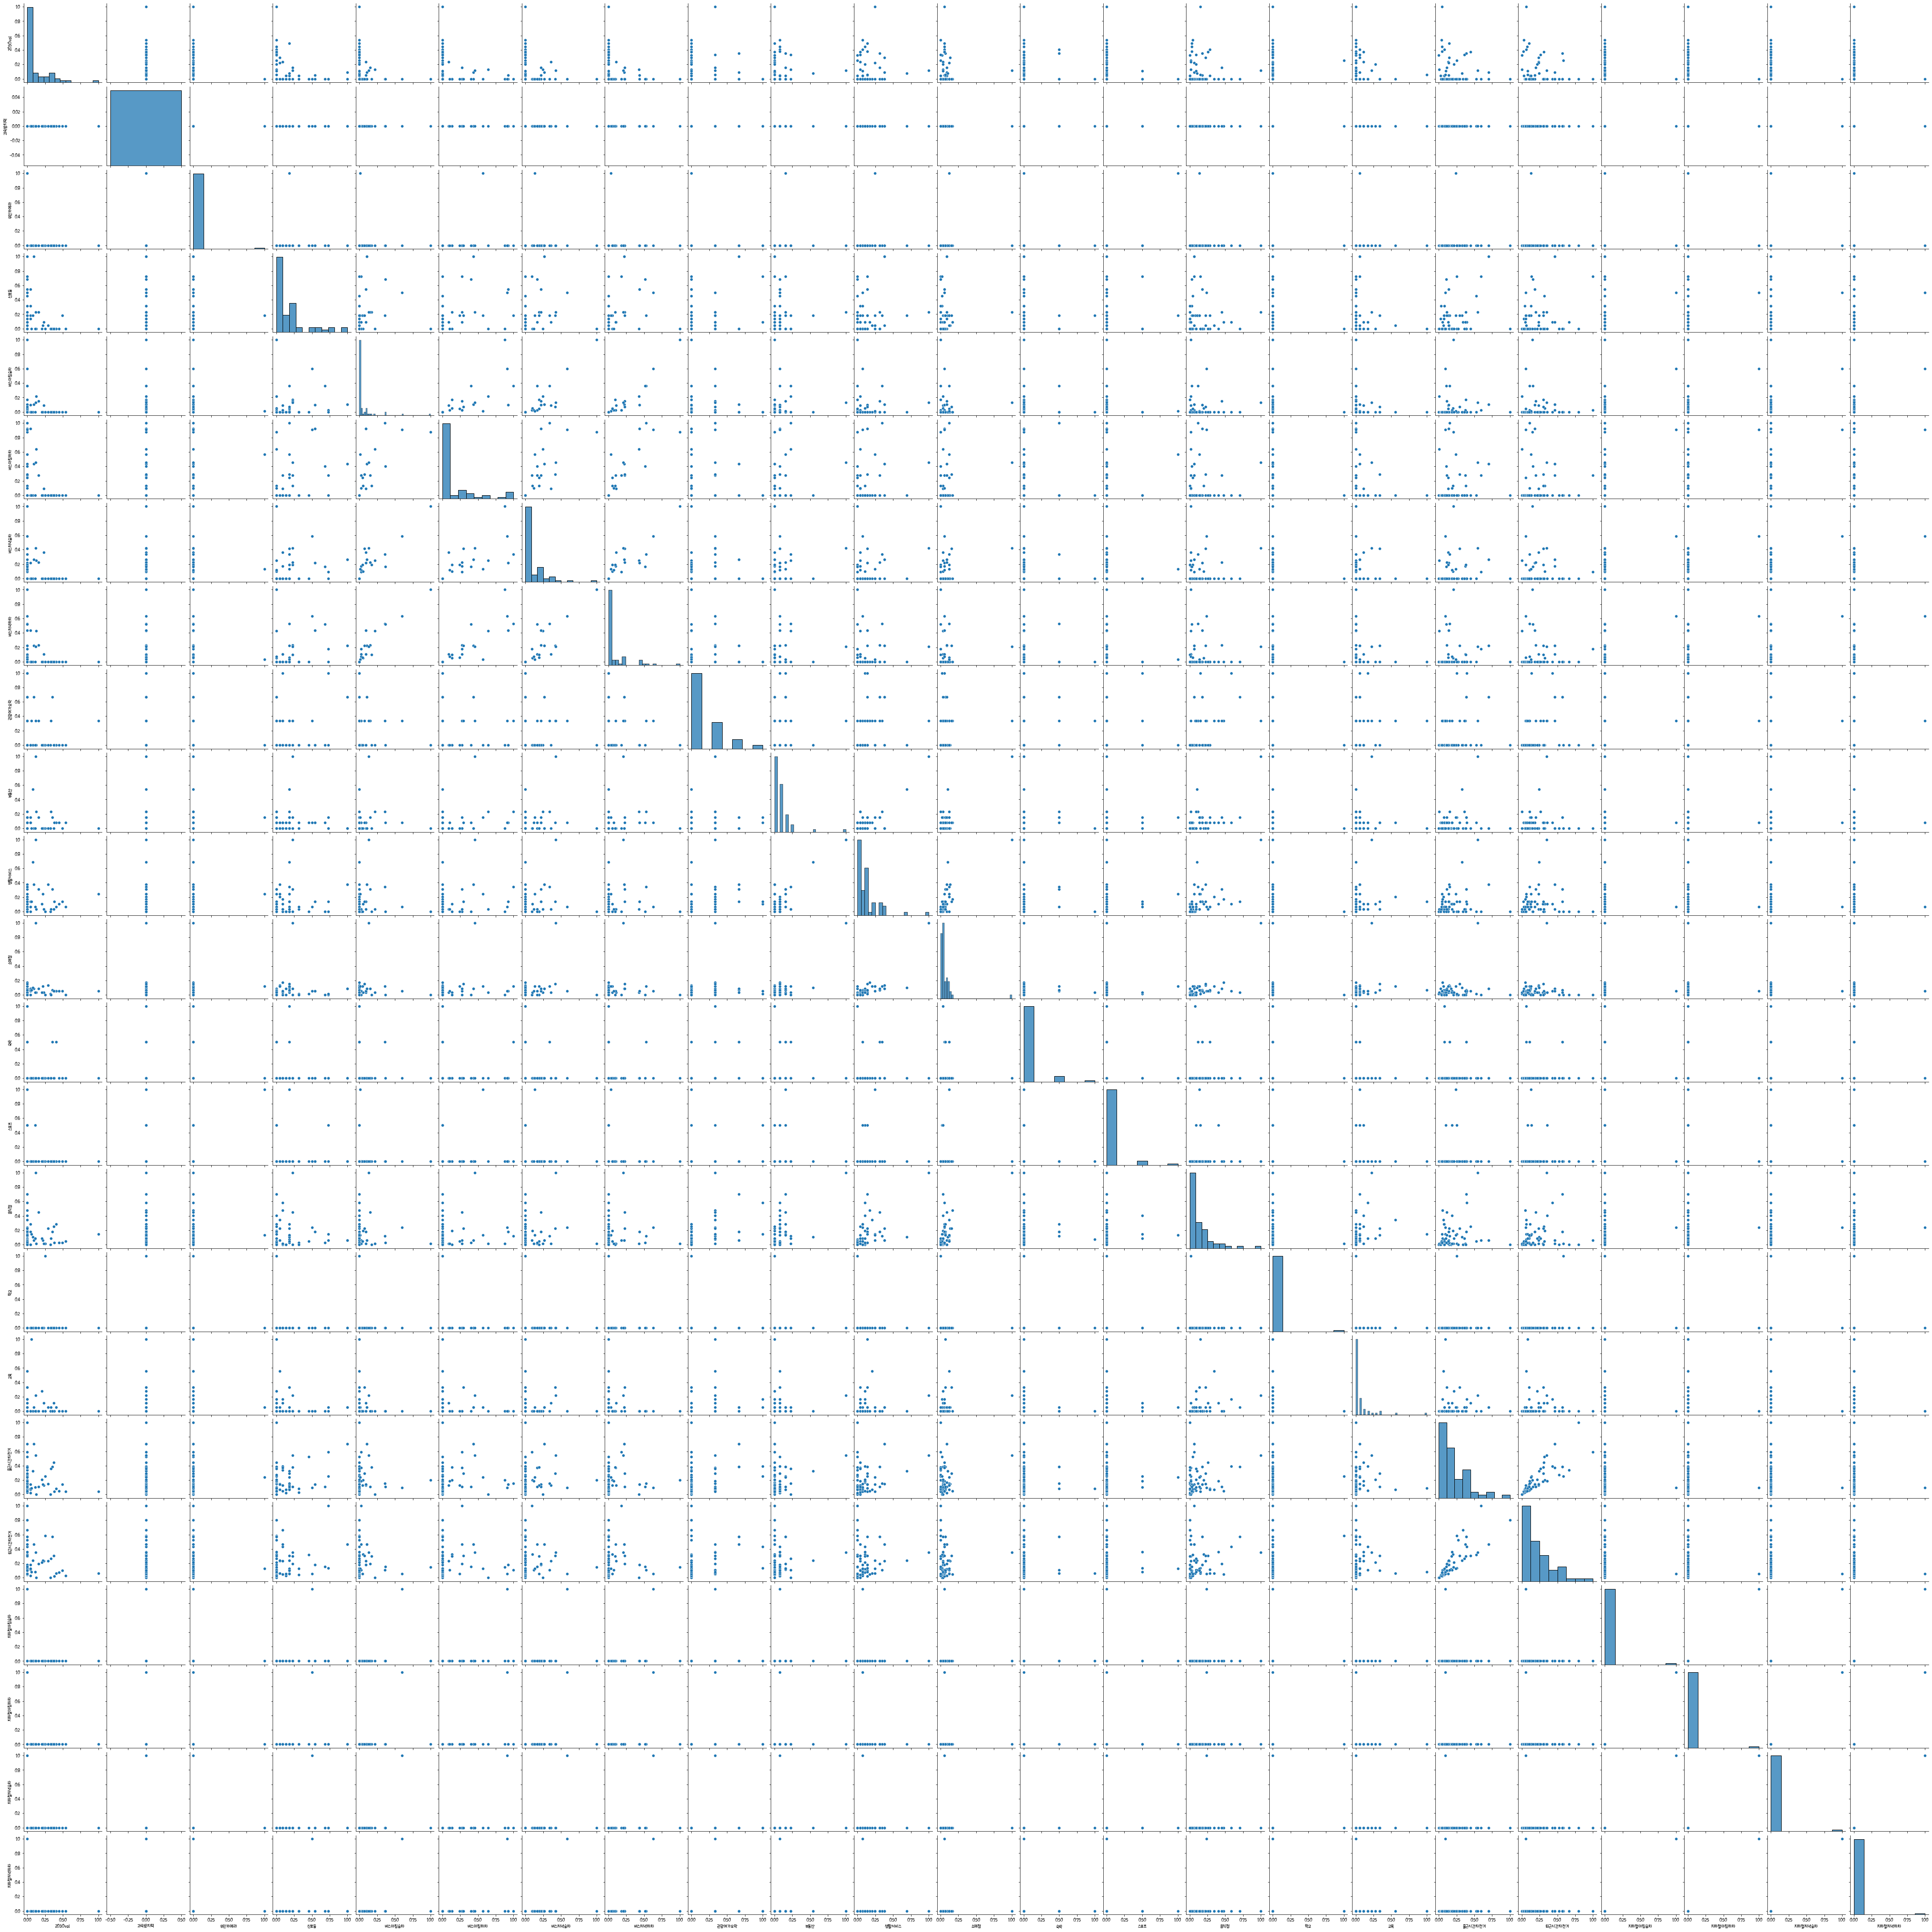

In [60]:
sns.pairplot(norm_new_final_data)


            
plt.savefig('output/그리드 전처리 완료/변수끼리 산점도_다중공선성 pairplot.png')

In [27]:
from statsmodels.stats.ouliers_influence import variance_inflation_factor 


vif = pd.DataFrame()
vif["VIF Factor"] = [varinace_inflation_factor(norm_new_final_data.values, i) for i in range(norm_new_final_data.shape[1])]
vif["features"] = norm_new_final_data.columns
vif

ModuleNotFoundError: No module named 'statsmodels.stats.ouliers_influence'

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(picher_df_corr.values, i) for i in range(picher_df_corr.shape[1])]
vif["features"] = picher_df_corr.columns
vif

In [ ]:
## 다중공선성 문제와 변수 선택법

In [50]:
final_data

,acci_cnt,2030val,과속방지턱,무인카메라,신호등,버스아침승차,버스아침하차,버스저녁승차,버스저녁하차,관광여가오락,...,스포츠,음식점,학교,교육,출근시간자전거,퇴근시간자전거,지하철아침승차,지하철아침하차,지하철저녁승차,지하철저녁하차
gid,,,,,,,,,,,,,,,,,,,,,
다사542434,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,46,201,0.0,0.0,0.0,0.0
다사547430,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,53,137,0.0,0.0,0.0,0.0
다사549419,1.0,67.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,2,10,0.0,0.0,0.0,0.0
다사551417,1.0,26.0,0.0,0.0,0.0,2486.75,3392.25,1914.833333,3168.333333,0.0,...,0.0,1.0,0.0,0.0,3,9,0.0,0.0,0.0,0.0
다사564435,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,3.0,0.0,0.0,16,54,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
다사559438,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,23,105,0.0,0.0,0.0,0.0
다사618387,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
다사559464,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,135,886,0.0,0.0,0.0,0.0


In [49]:
x_data = final_data[['2030val', '과속방지턱', '무인카메라', '신호등', '버스아침승차',
       '버스저녁승차', '버스저녁하차', '관광여가오락', '부동산', '생활서비스', '소매점', '숙박', '스포츠', '음식점',
       '학교', '교육', '출근시간자전거', '퇴근시간자전거', '지하철아침승차', '지하철저녁승차']] 
target = final_data[["acci_cnt"]]


# OLS 검정
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               acci_cnt   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              17.65
Date:                Thu, 20 May 2021   Prob (F-statistic):                    2.33e-61
Time:                        17:39:49   Log-Likelihood:                          9435.9
No. Observations:                8988   AIC:                                 -1.883e+04
Df Residuals:                    8968   BIC:                                 -1.869e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
2030val    -4.605e-05   1.59e-05     -2.896      0.004   -7.72e-05   -1.49e-05
과속방지턱         -0.0019      0.010     -0.181      0.856      -0.022       0.018
무인카메라         -0.0234      0.009     -2.677      0.007      -0.041      -0.006
신호등            0.0046      0.000      9.376      0.000       0.004       0.006
버스아침승차      2.995e-08   2.13e-06      0.014      0.989   -4.14e-06     4.2e-06
버스저녁승차     -3.295e-06   2.83e-06     -1.166      0.243   -8.83e-06    2.24e-06
버스저녁하차      1.562e-05   3.31e-06      4.714      0.000    9.12e-06    2.21e-05
관광여가오락        -0.0005      0.002     -0.242      0.809      -0.004       0.003
부동산        -1.107e-05      0.001     -0.010      0.992      -0.002       0.002
생활서비스          0.0015      0.001      2.746      0.006       0.000       0.003
소매점           -0.0004      0.000     -2.734      0.006      -0.001      -0.000
숙박             0.0032      0.004      0.783      0.434      -0.005       0.011
스포츠            0.0074      0.007      1.127      0.260      -0.005       0.020
음식점            0.0008      0.000      4.028      0.000       0.000       0.001
학교             0.0023      0.007      0.325      0.745      -0.012       0.016
교육            -0.0008      0.001     -1.351      0.177      -0.002       0.000
출근시간자전거     2.023e-05   3.15e-05      0.642      0.521   -4.15e-05     8.2e-05
퇴근시간자전거     4.966e-06    7.1e-06      0.700      0.484   -8.95e-06    1.89e-05
지하철아침승차    -4.473e-07    1.6e-07     -2.795      0.005   -7.61e-07   -1.34e-07
지하철저녁승차     1.542e-07   5.35e-08      2.881      0.004    4.93e-08    2.59e-07
==============================================================================
Omnibus:                    15491.681   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10759906.886
Skew:                          12.273   Prob(JB):                         0.00
Kurtosis:                     170.717   Cond. No.                     2.83e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""